In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_features=10,
                          n_samples=1000,
                          n_informative=5,
                          n_classes=2,
                          random_state=45)

In [5]:
X

array([[ 1.79236055,  0.58811013,  0.36282018, ..., -1.53169193,
         0.62338494, -0.66264622],
       [-1.00740319,  2.25929667,  0.0600527 , ..., -1.61865479,
        -0.06138838,  2.47200015],
       [-2.11567637, -1.63338265, -1.95926598, ..., -1.55197534,
         0.68655949,  0.17009269],
       ...,
       [-1.05453941,  1.18755874,  0.49786192, ..., -0.48588274,
        -1.12968798, -0.43127762],
       [-0.39681221,  0.94411064,  3.09697734, ..., -0.75887807,
         0.11231463, -2.56188825],
       [-0.81540168,  1.38970056,  1.93541354, ..., -1.31011641,
        -0.67273907, -0.92526956]])

In [6]:
Y

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## converting X and Y into dataframe

In [8]:
x=pd.DataFrame(X)
y=pd.DataFrame(Y)

## Checking null valuess

In [10]:
x.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [11]:
y.isnull().sum()

0    0
dtype: int64

## Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=45)

## building NN 

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout  #Dropout is used to avoid overfitting

In [19]:
nn=Sequential()

In [21]:
#Hidden layer 1  with inputs
nn.add(Dense(128,activation='relu',input_dim=x_train.shape[1]))

#Hidden layer 2 
nn.add(Dense(64,activation='relu'))

#Hidden layer 3
nn.add(Dense(32,activation='relu'))

# Output Layer (For Binary Classification use sigmoid for regession use linear activaion function)
nn.add(Dense(1,activation='sigmoid'))

In [22]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 28,353
Trainable params: 28,353
Non-traina

In [23]:
#compile
nn.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [24]:
#fitting the model
hist=nn.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 12ms/step - loss: 0.5760 - accuracy: 0.7078 - val_loss: 0.4258 - val_accuracy: 0.8438
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.8297 - val_loss: 0.3635 - val_accuracy: 0.8625
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8297 - val_loss: 0.3670 - val_accuracy: 0.8313
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8562 - val_loss: 0.3419 - val_accuracy: 0.8562
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8484 - val_loss: 0.3073 - val_accuracy: 0.8625
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8734 - val_loss: 0.3098 - val_accuracy: 0.8687
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.8891 - val_loss: 0.3068 - val_accuracy: 0.8813
Epoch 8/100


20/20 [==============================] - 0s 2ms/step - loss: 4.0176e-04 - accuracy: 1.0000 - val_loss: 1.1801 - val_accuracy: 0.8125
Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 3.7832e-04 - accuracy: 1.0000 - val_loss: 1.1906 - val_accuracy: 0.8125
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 3.6427e-04 - accuracy: 1.0000 - val_loss: 1.2000 - val_accuracy: 0.8125
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 3.4654e-04 - accuracy: 1.0000 - val_loss: 1.2005 - val_accuracy: 0.8062
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 3.2324e-04 - accuracy: 1.0000 - val_loss: 1.2169 - val_accuracy: 0.8125
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 3.0867e-04 - accuracy: 1.0000 - val_loss: 1.2268 - val_accuracy: 0.8125
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 2.9059e-04 - accuracy: 1.0000 - val_loss: 1.2267 - val_accuracy

## Visualizing learning curve for the model

Text(0, 0.5, 'binary cross entropy')

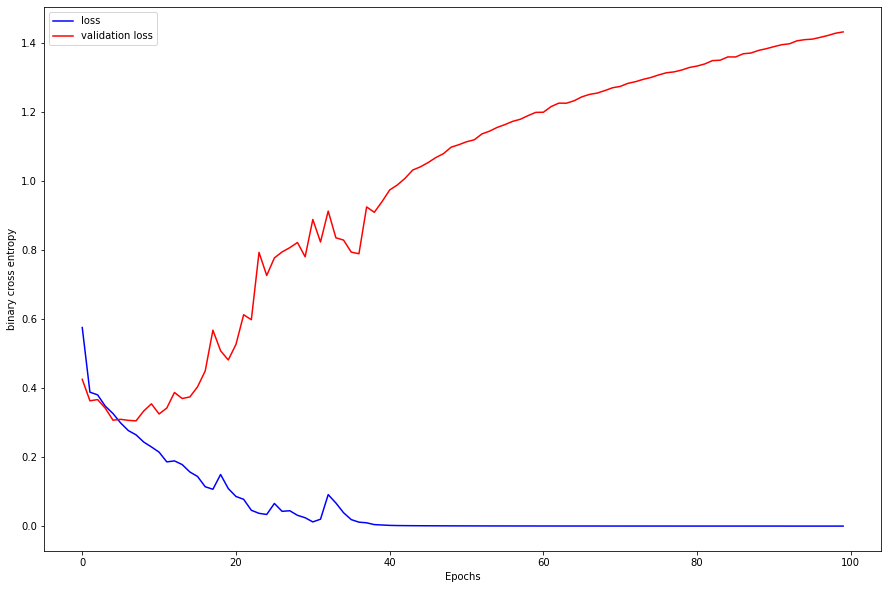

In [31]:
plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'],c='blue',label="loss")
plt.plot(hist.history['val_loss'],c='red',label="validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("binary cross entropy")

## evaluation of model

In [33]:
nn.evaluate(x_train,y_train)

25/25 [==============================] - 0s 962us/step - loss: 0.2868 - accuracy: 0.9625


[0.2867584526538849, 0.9624999761581421]

In [34]:
nn.evaluate(x_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.2878 - accuracy: 0.8400


[1.2877904176712036, 0.8399999737739563]

### we can see in graph as well as evaluation that model is overfiiting,to avoid such case we use Dropout